In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from dandi import dandiapi
from pynwb import NWBHDF5IO

%matplotlib inline

In [2]:
stim_filepath = f"../../../data/visual_coding/sub-699733573_ses-715093703.nwb"
stim_io = NWBHDF5IO(stim_filepath, mode="r", load_namespaces=True)
stim_file = stim_io.read() 
units = stim_file.units.to_dataframe()
units.head()

C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,snr,quality,presence_ratio,spread,cumulative_drift,isolation_distance,amplitude,firing_rate,nn_hit_rate,isi_violations,...,waveform_duration,local_index,max_drift,velocity_above,cluster_id,peak_channel_id,d_prime,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
950922146,2.276506,good,0.99,40.0,262.59,48.682817,173.55585,3.534362,0.951456,0.040655,...,0.480737,7,24.71,-1.922948,7,850261194,5.529560,"[31.490034958356276, 32.92370245071491, 35.505...","[0.0001615638969686343, 0.0001146743934257875,...","[[0.0, -0.16964999999999364, 0.642329999999995..."
950922020,2.451651,good,0.99,60.0,313.14,30.717576,114.49386,4.218833,0.844371,0.116510,...,0.563149,1,15.30,-0.529792,1,850261194,2.341324,"[27.189465814863283, 27.352032575157004, 27.41...","[0.0001779263088556941, 0.0001903679273326421,...","[[0.0, -0.8997299999999999, -0.872429999999994..."
950921996,2.556012,good,0.99,30.0,299.83,39.067902,102.98964,6.499649,0.904659,0.105187,...,0.535678,0,20.02,0.343384,0,850261194,3.750008,"[26.971165689137713, 27.075865749437607, 27.10...","[0.0001381400932624782, 0.000185573120709172, ...","[[0.0, 2.752229999999992, 0.5171399999999995, ..."
950922084,1.847681,good,0.99,40.0,460.51,21.987697,143.74971,3.715021,0.553741,1.181287,...,0.631826,4,30.47,0.206030,4,850261196,2.192356,"[27.442999294214125, 27.739099464747063, 27.91...","[0.0001200643878712399, 0.00011509520337930783...","[[0.0, 0.5342999999999982, 0.10296000000000127..."
950922063,1.856763,good,0.99,40.0,266.38,47.741669,140.45070,8.389565,0.902000,0.312214,...,0.590620,3,9.71,-0.686767,3,850261196,3.256906,"[27.284332536166527, 27.39949926916116, 27.456...","[0.000126385992005961, 0.00018898987536720963,...","[[0.0, -0.21762000000000725, -1.52996999999998..."


In [3]:
units.shape

(2779, 29)

In [4]:
units.keys()

Index(['snr', 'quality', 'presence_ratio', 'spread', 'cumulative_drift',
       'isolation_distance', 'amplitude', 'firing_rate', 'nn_hit_rate',
       'isi_violations', 'velocity_below', 'l_ratio', 'nn_miss_rate',
       'waveform_halfwidth', 'repolarization_slope', 'amplitude_cutoff',
       'PT_ratio', 'silhouette_score', 'recovery_slope', 'waveform_duration',
       'local_index', 'max_drift', 'velocity_above', 'cluster_id',
       'peak_channel_id', 'd_prime', 'spike_times', 'spike_amplitudes',
       'waveform_mean'],
      dtype='object')

In [5]:
good_units = units[units.quality == 'good']

In [6]:
# sorting units by quality or other attribute (or firing rate?)
# plot spike times for units
# show average waveform across units (possibly in different brain areas?)
# selection of unit
# showing waveform
# for unit, plot firing rate over time or drift
# show unit location

### Showing Spike Times

In [56]:
stim_time = 9570
n_units = 100
start_time = -0.1
end_time = 5

In [115]:
spike_times = np.array([elem for elem in good_units.spike_times[:800]])
spike_times.shape

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_21284\349802663.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array([elem for elem in good_units.spike_times[:800]])


(800,)

In [116]:
time_bin_edges = np.linspace(start_time, end_time, 200)

In [117]:
hists = []
for unit_spike_times in spike_times:
    hist, bins = np.histogram(unit_spike_times-stim_time, bins=time_bin_edges)
    hists.append(hist)
hists = np.array(hists)

hists.shape

(800, 199)

Text(0.5, 1.0, 'unit spikes over time')

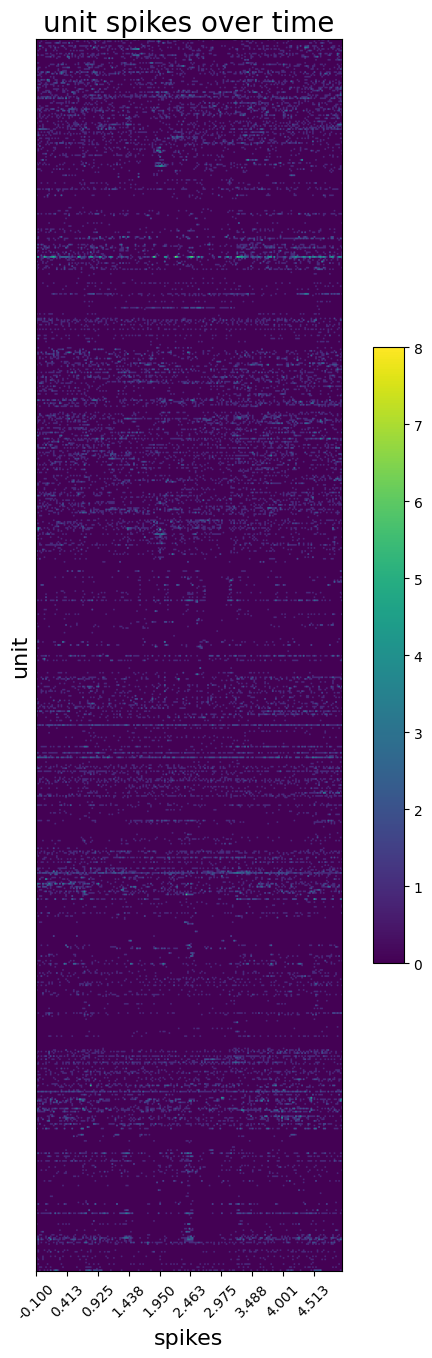

In [120]:
fig, ax = plt.subplots(figsize=(8,16))
img = ax.imshow(hists)
plt.colorbar(img, shrink=0.5)

ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_ylabel("units", fontsize=16)

xtick_step=20
reltime = np.array(time_bin_edges)
ax.set_xticks(np.arange(0, len(reltime), xtick_step))
ax.set_xticklabels([f'{mp:1.3f}' for mp in reltime[::xtick_step]], rotation=45)

ax.set_xlabel("spikes", fontsize=16)
ax.set_title("unit spikes over time", fontsize=20)

### Waveforms

In [ ]:
unit_num = 950913039

In [ ]:
units.waveform_mean[950913039].shape

In [ ]:
waveforms = np.array([waveform for waveform in units.waveform_mean])
waveforms.shape

In [ ]:
avg_waveform = np.average(waveforms,axis=0)
avg_waveform.shape

In [ ]:
fig, ax = plt.subplots()
# for waveform in waveforms:
#     ax.plot(waveform)
ax.plot(avg_waveform)
plt.show()

In [ ]:
waveform = units.waveform_mean[unit_num]
waveform.shape

In [ ]:
unit_avg_waveform = np.average(waveform, axis=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(unit_avg_waveform)
plt.show()

### Allen SKD code

In [ ]:
    def presentationwise_spike_counts(
        self,
        bin_edges,
        stimulus_presentation_ids,
        unit_ids,
        binarize=False,
        dtype=None,
        large_bin_size_threshold=0.001,
        time_domain_callback=None
    ):
        ''' Build an array of spike counts surrounding stimulus onset per
        unit and stimulus frame.

        Parameters
        ---------
        bin_edges : numpy.ndarray
            Spikes will be counted into the bins defined by these edges.
            Values are in seconds, relative to stimulus onset.
        stimulus_presentation_ids : array-like
            Filter to these stimulus presentations
        unit_ids : array-like
            Filter to these units
        binarize : bool, optional
            If true, all counts greater than 0 will be treated as 1. This
            results in lower storage overhead, but is only reasonable if bin
            sizes are fine (<= 1 millisecond).
        large_bin_size_threshold : float, optional
            If binarize is True and the largest bin width is greater than
            this value, a warning will be emitted.
        time_domain_callback : callable, optional
            The time domain is a numpy array whose values are trial-aligned bin
            edges (each row is aligned to a different trial). This optional
            function will be applied to the time domain before counting spikes.

        Returns
        -------
        xarray.DataArray :
            Data array whose dimensions are stimulus presentation, unit,
            and time bin and whose values are spike counts.

        '''

        stimulus_presentations = self._filter_owned_df(
            'stimulus_presentations',
            ids=stimulus_presentation_ids)
        units = self._filter_owned_df('units', ids=unit_ids)

        largest_bin_size = np.amax(np.diff(bin_edges))
        if binarize and largest_bin_size > large_bin_size_threshold:
            warnings.warn(
                'You\'ve elected to binarize spike counts, but your maximum '
                f'bin width is {largest_bin_size:2.5f} seconds. '
                'Binarizing spike counts with such a large bin width can '
                'cause significant loss of accuracy! '
                'Please consider only binarizing spike counts '
                f'when your bins are <= {large_bin_size_threshold} '
                'seconds wide.'
            )

        bin_edges = np.array(bin_edges)
        domain = build_time_window_domain(
            bin_edges,
            stimulus_presentations['start_time'].values,
            callback=time_domain_callback)

        out_of_order = np.where(np.diff(domain, axis=1) < 0)
        if len(out_of_order[0]) > 0:
            out_of_order_time_bins = \
                [(row, col) for row, col in zip(out_of_order)]
            raise ValueError("The time domain specified contains out-of-order "
                             f"bin edges at indices: {out_of_order_time_bins}")

        ends = domain[:, -1]
        starts = domain[:, 0]
        time_diffs = starts[1:] - ends[:-1]
        overlapping = np.where(time_diffs < 0)[0]

        if len(overlapping) > 0:
            # Ignoring intervals that overlaps multiple time bins because
            # trying to figure that out would take O(n)
            overlapping = [(s, s + 1) for s in overlapping]
            warnings.warn("You've specified some overlapping time intervals "
                          f"between neighboring rows: {overlapping}, "
                          "with a maximum overlap of"
                          f" {np.abs(np.min(time_diffs))} seconds.")

        tiled_data = build_spike_histogram(
            domain,
            self.spike_times,
            units.index.values,
            dtype=dtype,
            binarize=binarize
        )

        stim_presentation_id = stimulus_presentations.index.values

        tiled_data = xr.DataArray(
            name='spike_counts',
            data=tiled_data,
            coords={
                'stimulus_presentation_id': stim_presentation_id,
                'time_relative_to_stimulus_onset': (bin_edges[:-1] +
                                                    np.diff(bin_edges) / 2),
                'unit_id': units.index.values
            },
            dims=['stimulus_presentation_id',
                  'time_relative_to_stimulus_onset',
                  'unit_id']
        )

        return tiled_data


In [ ]:
# We're going to build an array of spike counts surrounding stimulus presentation onset
# To do that, we will need to specify some bins (in seconds, relative to stimulus onset)
time_bin_edges = np.linspace(-0.01, 0.4, 200)

# look at responses to the flash stimulus
flash_250_ms_stimulus_presentation_ids = session.stimulus_presentations[
    session.stimulus_presentations['stimulus_name'] == 'flashes'
].index.values

# and get a set of units with only decent snr
decent_snr_unit_ids = session.units[
    session.units['snr'] >= 1.5
].index.values

spike_counts_da = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=flash_250_ms_stimulus_presentation_ids,
    unit_ids=decent_snr_unit_ids
)
spike_counts_da

In [ ]:
data_array = good_units.spike_times

fig, ax = plt.subplots(figsize=(12, 12))

img = ax.imshow(data_array.T, interpolation='none')
plt.colorbar(img, cax=cbar_axis)

cbar_axis.set_ylabel(cbar_label, fontsize=16)

ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_ylabel(ylabel, fontsize=16)

reltime = np.array(time_coords)
ax.set_xticks(np.arange(0, len(reltime), xtick_step))
ax.set_xticklabels([f'{mp:1.3f}' for mp in reltime[::xtick_step]], rotation=45)
ax.set_xlabel(xlabel, fontsize=16)

ax.set_title(title, fontsize=20)

return fig